In [1]:
import pandas as pd
import reverse_geocoder as rg
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
from pprint import pprint
import csv


%matplotlib inline
from os.path import join

In [2]:
d_path = "./"

d_file = "taxi-trips.csv"

df = pd.read_csv(join(d_path, d_file))

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [4]:
n_rows, n_columns = df.shape  # get the shape of dataframe
print("{} rows x {} columns".format(n_rows, n_columns))

118185 rows x 11 columns


In [5]:
print(df.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [6]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
ds_explain = [["id", "a unique identifier for each trip"], ["vendor id ", "a code indicating the provider associated with the trip record"], ["pickup datetime ", "date and time when the meter was engaged"], ["dropoff datetime ", "date and time when the meter was disengaged"], ["passenger count", "the number of passengers in the vehicle"], ["pickup longitude", "the longitude where the meter was engaged"], ["pickup latitude", "the latitude where the meter was engaged"], ["dropoff longitude", "the longitude where the meter was disengaged"], ["dropoff store and fwd flag", "indicates whether the trip record was held in vehicle memory"], ["trip duration", "duration of the trip in seconds"] ]
pd.DataFrame(ds_explain, columns=["Attribute", "Explanation"])

,Attribute,Explanation
0,id,a unique identifier for each trip
1,vendor id,a code indicating the provider associated with...
2,pickup datetime,date and time when the meter was engaged
3,dropoff datetime,date and time when the meter was disengaged
4,passenger count,the number of passengers in the vehicle
5,pickup longitude,the longitude where the meter was engaged
6,pickup latitude,the latitude where the meter was engaged
7,dropoff longitude,the longitude where the meter was disengaged
8,dropoff store and fwd flag,indicates whether the trip record was held in ...
9,trip duration,duration of the trip in seconds


In [8]:
pLat=df['pickup_latitude']
pLong=df['pickup_longitude']


In [9]:
pDCor=[]

for i in range(118185): #118185
    pDCoor = (pLat[i], pLong[i])
    pDCor.append(pDCoor)    

In [10]:
pDNames = rg.search(pDCor)

Loading formatted geocoded file...


In [11]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [12]:
#pp.pprint(pDCor)

In [13]:
#pp.pprint(pDNames)

In [14]:
for i in range(118185): #118185
    pDName = (pDNames[i])['name']
    pDNames[i]=pDName
#pp.pprint(pDNames)


In [15]:
df['pickup_district']=pDNames

In [16]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City


In [17]:
dLat=df['dropoff_latitude']
dLong=df['dropoff_longitude']

dDCor=[]

for i in range(118185): #118185
    dDCoor = (dLat[i], dLong[i])
    dDCor.append(dDCoor) 

In [18]:
 
    
dDNames = rg.search(dDCor)

for i in range(118185): #118185
    dDName = (dDNames[i])['name']
    dDNames[i]=dDName
#pp.pprint(dDNames)

In [19]:
df['dropoff_district']=dDNames

In [20]:
from collections import Counter

print("Top 5 districts where passengers prefer to leave")
pDCounter = Counter(pDNames)
pDCounter.most_common(5)


Top 5 districts where passengers prefer to leave


[('Manhattan', 45329),
 ('New York City', 34625),
 ('Long Island City', 17787),
 ('Weehawken', 11334),
 ('The Bronx', 2777)]

In [21]:
print("Top 5 districts where passengers prefer to arrive")
dDCounter = Counter(dDNames)
dDCounter.most_common(5)

Top 5 districts where passengers prefer to arrive


[('Manhattan', 44478),
 ('New York City', 31082),
 ('Long Island City', 19919),
 ('Weehawken', 10621),
 ('Brooklyn', 2059)]

In [22]:
from geopy import distance

In [23]:
dst = []
for i in range(118185): #118185
    disstance = distance.distance(pDCor[i], dDCor[i]).km
    dst.append(disstance)


In [24]:
df['distance']=dst

In [25]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.502172
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5.114807
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.495018
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.976279
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.513961


In [26]:
itsTime=df['pickup_datetime']
ofDay = []

In [27]:
for i in range(118185): #118185
    temp=int(str(itsTime[i][11:13]))
    if temp >= 7 and temp <9:
        ofDay.append('rush_hour_morning')
    elif temp >= 9 and temp <16:
        ofDay.append('afternoon')
    elif temp >= 16 and temp <18:
        ofDay.append('rush_hour_evening')
    elif temp >= 18 and temp <23:
        ofDay.append('evening')   
    else:
        ofDay.append('late_night') 
df['time_of_day']=ofDay

In [28]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.502172,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5.114807,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.495018,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.976279,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.513961,afternoon


time_of_day
afternoon            3.109986
evening              3.378136
late_night           4.117635
rush_hour_evening    3.342814
rush_hour_morning    3.128280
dtype: float64


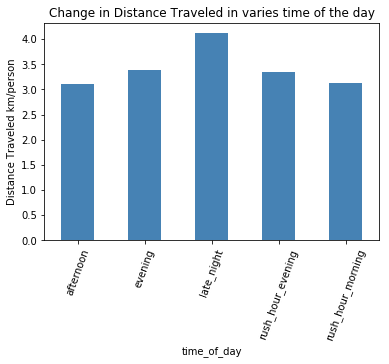

In [29]:
time_frames = df.groupby(by="time_of_day").sum()["distance"]
no_rides = df.groupby(by="time_of_day").count()["id"]
#pp.pprint(time_frames)
#pp.pprint(no_rides)
dRidden = time_frames/no_rides
print(dRidden)
#pp.pprint(dRidden)

ax = dRidden.plot(kind="bar", color="steelblue",rot=70)



plt.ylabel("Distance Traveled km/person")
plt.title("Change in Distance Traveled in varies time of the day")
plt.show()


time_of_day
afternoon             963.922746
evening               893.595329
late_night            866.095457
rush_hour_evening    1024.494552
rush_hour_morning     918.488716
dtype: float64


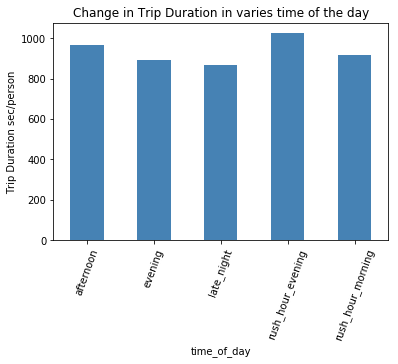

In [30]:
tDur = df.groupby(by="time_of_day").sum()["trip_duration"]
no_rides = df.groupby(by="time_of_day").count()["id"]
#pp.pprint(time_frames)
#pp.pprint(no_rides)
tDurVar = tDur/no_rides
print(tDurVar)
#pp.pprint(dRidden)

bx = tDurVar.plot(kind="bar", color="steelblue",rot=70)

plt.ylabel("Trip Duration sec/person")
plt.title("Change in Trip Duration in varies time of the day")
plt.show()


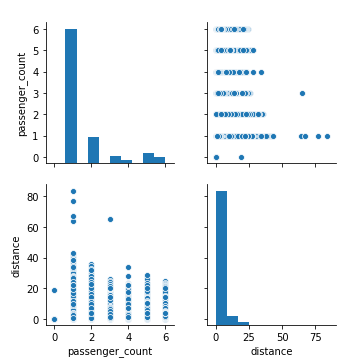

In [31]:
#hp1 = df["passenger_count"]
#dif_dis = df["distance"]
#pp.pprint(hp1)
#pp.pprint(dif_dis)
hp1Var=['passenger_count','distance']
sns.pairplot(data=df, vars=hp1Var)

#pp.pprint(dRidden)

cx = plt.plot()#(kind="bar", color="steelblue",rot=70)

plt.ylabel("Trip Duration sec/km")
plt.title(" ")
plt.show()


Graph in down left shows in general, most trips will take simiral time but at extreme ends, trips with less passengers can travel more distance than trips with more passenger.

In [32]:
import datetime

dates = []
dOW = []
for i in range(118185): #118185
    tempY = int(str(itsTime[i]).split(" ")[0].split("-")[0])
    tempM = int(str(itsTime[i]).split(" ")[0].split("-")[1])
    tempD = int(str(itsTime[i]).split(" ")[0].split("-")[2])
    
    tempDate=datetime.date(tempY, tempM, tempD)
    dates.append("tempDate") 
    dOW.append(tempDate.strftime("%A"))
    #print(tempDay)
    #day_of_week.append("tempDay")

#pp.pprint(day_of_week)

df['day_of_week']=dOW

day_of_week
Friday       989.462604
Monday       913.259396
Saturday     865.602612
Sunday       926.430839
Thursday     942.156377
Tuesday      904.742334
Wednesday    948.206465
dtype: float64


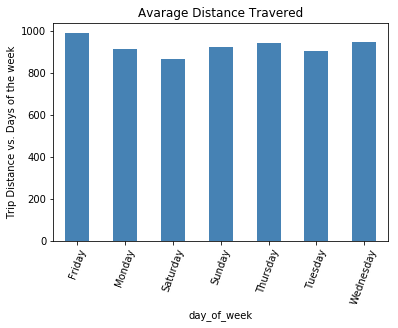

In [33]:
tDurDays = df.groupby(by="day_of_week").sum()["trip_duration"]
no_ridesPDays = df.groupby(by="day_of_week").count()["id"]

hp2Var= tDurDays/no_ridesPDays
#sns.pairplot(data=df, vars=hp2Var)

pp.pprint(hp2Var)

dx = hp2Var.plot(kind="bar", color="steelblue",rot=70)

plt.ylabel("Trip Distance vs. Days of the week")
plt.title("Avarage Distance Travered")
plt.show()

In this graph, we can see with small difrences, The day of the week has little to no effect on the avarage distance travered.

day_of_week
Friday       17926094
Monday       14142735
Saturday     16306222
Sunday       14708016
Thursday     16435918
Tuesday      14220740
Wednesday    15839789
Name: trip_duration, dtype: int64


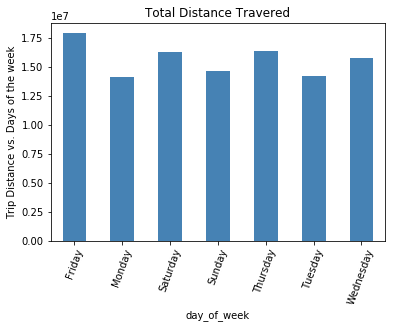

In [34]:
pp.pprint(tDurDays)

ex = tDurDays.plot(kind="bar", color="steelblue",rot=70)

plt.ylabel("Trip Distance vs. Days of the week")
plt.title("Total Distance Travered")
plt.show()

But if we look to Total Distance Traveled, we can se big difrences. So in total Distance traveled, The day of the week has some effect on the distance traveled.